## Imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

## Reading in Data 

In [2]:
df = pd.read_csv('../datasets/subs2.csv', encoding='utf-8')


In [3]:
df.head()

,title,self_text,subreddit,text_words
0,Looking for Costa Rican Spanish speakers for a...,hey guys! i'm a linguistics phd student and i'...,0,123
1,Traveling to CR as a tica...,hi! i am costa_rican-american but have never b...,0,167
2,Puerto Viejo,"sunset pic on the caribbean coast, thanks to s...",0,11
3,Bought a bed. They made it right in front of me!,nice craftsmanship and impressed they built an...,0,26
4,How can I give back to Costa Rica?,"hi, if i move to costa_rica part time as an am...",0,36


## Reading in Custom Stopwords


In [4]:
stopwords_df = pd.read_csv('../datasets/custom_stopwords.csv')
stopwords_new = stopwords_df['custom_stopwords'].tolist()
stopwords = stopwords.words('english')
stopwords_custom = stopwords +stopwords_new

## Setting up Data 

In [5]:
X= df['self_text']
y=df['subreddit']

## Train Test Split 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Setting up stemming and lemmatizing 

In [7]:
def lemmatize(words):
    split_words = words.split()
    lem = WordNetLemmatizer()
    return ' '.join([lem.lemmatize(word) for word in split_words])

In [8]:
def stem(words):
    split_words = words.split()
    stem = PorterStemmer()
    return ' '.join([stem.stem(word) for word in split_words])

## Gridsearch with Logistic Regression 

In [9]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression())
     ])

In [19]:
params = {
    'cvec__stop_words' : [None, "english", stopwords_custom],
    'cvec__preprocessor': [None, lemmatize, stem],
    'cvec__ngram_range': [(1,1), (1,2), (2,2)],
    'lr__penalty': [None, 'l1', 'l2'],
    'lr__n_jobs': [10]
}

gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'cvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
                         'cvec__preprocessor': [None,
                                                <function lemmatize at 0x0000022B6EC5A0E0>,
                                                <function stem at 0x0000022B6EC5A290>],
                         'cvec__stop_words': [None, 'english',
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you...
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...],
                                              ['thanks', 'good', 'know', 'want',
                                               'time', 'just', 'like', 'day',
                                               've', 'wa', 'don', 'de',
                                               'thanks', 'que', 'hi', 'hey',
                                               'anyone', 'us', 'get', 'also',
                                               'https', 'ha', 'le', 'un', 'el',
                                               'la', 'en', 'es']],
                         'lr__n_jobs': [10],
                         'lr__penalty': [None, 'l1', 'l2']})

In [20]:
print('Train:', gs.score(X_train, y_train))
print('Test:', gs.score(X_test, y_test))

Train: 0.9913928012519562
Test: 0.6830985915492958


In [21]:
gs.best_params_

{'cvec__ngram_range': (1, 2),
 'cvec__preprocessor': <function __main__.lemmatize(words)>,
 'cvec__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
 

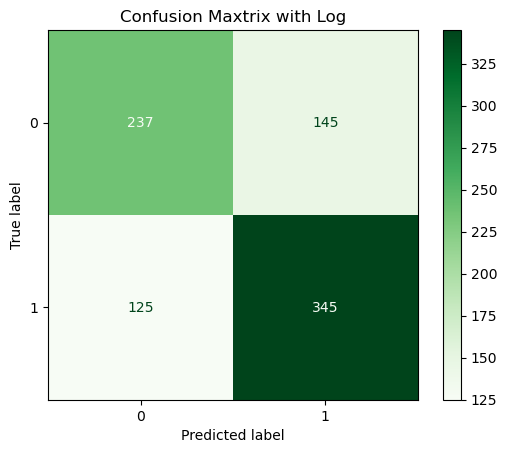

In [22]:
preds = gs.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap=plt.cm.Greens)
plt.title("Confusion Maxtrix with Log");
plt.savefig('../pictures/Confusion Maxtrix with Log.png', format='png')